In [1]:
import pandas as pd 
import numpy as np 
import requests
import matplotlib.pyplot as plt

In [3]:
from dotenv import load_dotenv
import os
load_dotenv()

# get the api key
API_KEY=os.getenv("STONK_API_KEY")

In [5]:
symbol = "SPY"
# interval = "5min"
# month = "2008-09"

res = requests.get(f"https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol={symbol}&apikey={API_KEY}")

In [6]:
df = pd.DataFrame.from_dict(res.json()['Weekly Time Series'], orient='index')
df = df.rename(columns=lambda x: x[3:])
df = df.apply(pd.to_numeric)
df['date'] = pd.to_datetime(df.index)
df.head()

,open,high,low,close,volume,date
2023-12-04,455.60,459.1206,454.34,456.69,72430888,2023-12-04
2023-12-01,454.65,459.6500,453.34,459.10,344703088,2023-12-01
2023-11-24,450.53,456.3800,450.52,455.30,208484220,2023-11-24
2023-11-17,439.23,451.4200,438.42,450.79,376600275,2023-11-17
2023-11-10,435.47,440.9300,433.40,440.61,366566272,2023-11-10


In [7]:
len(df)

1257

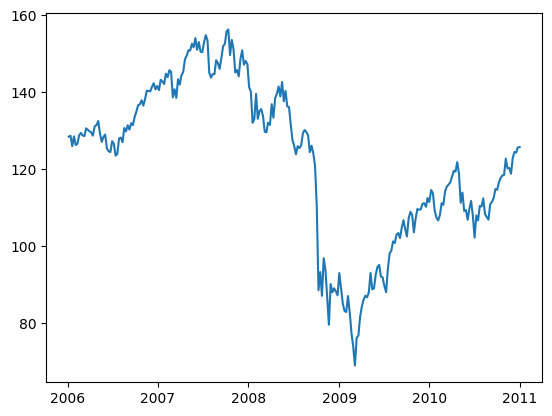

In [8]:
# create a chart with the closing price as a function of the date for the years 2006-2010
df_tmp = df[(df['date'] >= '2006-01-01') & (df['date'] <= '2010-12-31')]
# df_tmp = df
plt.plot(df_tmp['date'], df_tmp['close'])
plt.show()
